In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.grid'] = False

In [266]:
magpie_error = pd.read_csv('/data/magpie_error.csv').drop(columns = 'Unnamed: 0')
EC_error = pd.read_csv('/data/EC_errror.csv').drop(columns = 'Unnamed: 0')
physic_error = pd.read_csv('/data/physical_errror.csv').drop(columns = 'Unnamed: 0')

In [267]:
magpie_error = magpie_error.sample(frac=1, random_state=42).reset_index(drop = True)
magpie_error

,formula,valid_Eg,pred_Eg,diff
0,YCrO3,1.767900,1.189664,0.578236
1,SmCoO3,0.803900,0.686708,0.117192
2,NdCoO3,0.791400,0.880097,0.088697
3,CdSnO3,1.230115,1.952707,0.722592
4,SnPbO3,2.035434,1.927425,0.108010
5,PmErO3,3.361074,4.292482,0.931408
6,RbTaO3,3.238719,2.598412,0.640307
7,TaTlO3,1.757035,1.705481,0.051554
8,NdInO3,2.999078,4.035427,1.036349
9,CsNbO3,2.453558,2.656461,0.202902


In [270]:
# magpie_error.to_csv('magpie_error_si.csv')

In [268]:
# fit_formula = magpie_error['formula']
EC_error['formula'] = pd.Categorical(
    EC_error['formula'], 
    categories = magpie_error['formula'], 
    ordered=True
)
sorted_ec = EC_error.sort_values('formula').reset_index(drop=True)
sorted_ec

,formula,valid_Eg,pred_Eg,diff
0,YCrO3,1.767900,1.289950,0.477950
1,SmCoO3,0.803900,0.618314,0.185586
2,NdCoO3,0.791400,0.772964,0.018436
3,CdSnO3,1.230115,1.768132,0.538017
4,SnPbO3,2.035434,1.958886,0.076548
5,PmErO3,3.361074,3.817777,0.456702
6,RbTaO3,3.238719,3.157610,0.081108
7,TaTlO3,1.757035,1.602354,0.154681
8,NdInO3,2.999078,3.609956,0.610877
9,CsNbO3,2.453558,2.358636,0.094922


In [271]:
# sorted_ec.to_csv('ec_error_si.csv')

In [269]:
physic_error['formula'] = pd.Categorical(
    physic_error['formula'], 
    categories = magpie_error['formula'], 
    ordered=True
)
sorted_physic = physic_error.sort_values('formula').reset_index(drop=True)
sorted_physic

,formula,valid_Eg,pred_Eg,diff
0,YCrO3,1.767900,1.540153,0.227747
1,SmCoO3,0.803900,0.752723,0.051177
2,NdCoO3,0.791400,0.644832,0.146568
3,CdSnO3,1.230115,1.913411,0.683296
4,SnPbO3,2.035434,1.877888,0.157546
5,PmErO3,3.361074,3.817815,0.456740
6,RbTaO3,3.238719,3.288951,0.050232
7,TaTlO3,1.757035,1.604560,0.152475
8,NdInO3,2.999078,3.669587,0.670509
9,CsNbO3,2.453558,2.820931,0.367373


In [272]:
# sorted_physic.to_csv('phy_error_si.csv')

In [149]:
magpie_error = magpie_error['diff']
ec_error = sorted_ec['diff']
physic_error = sorted_physic['diff']

In [50]:
def normalize(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    return (arr - arr_min) / (arr_max - arr_min + 1e-8)

In [150]:
magpie_pre = normalize(magpie_error)
ec_pre = normalize(ec_error)
physic_pre = normalize(physic_error)

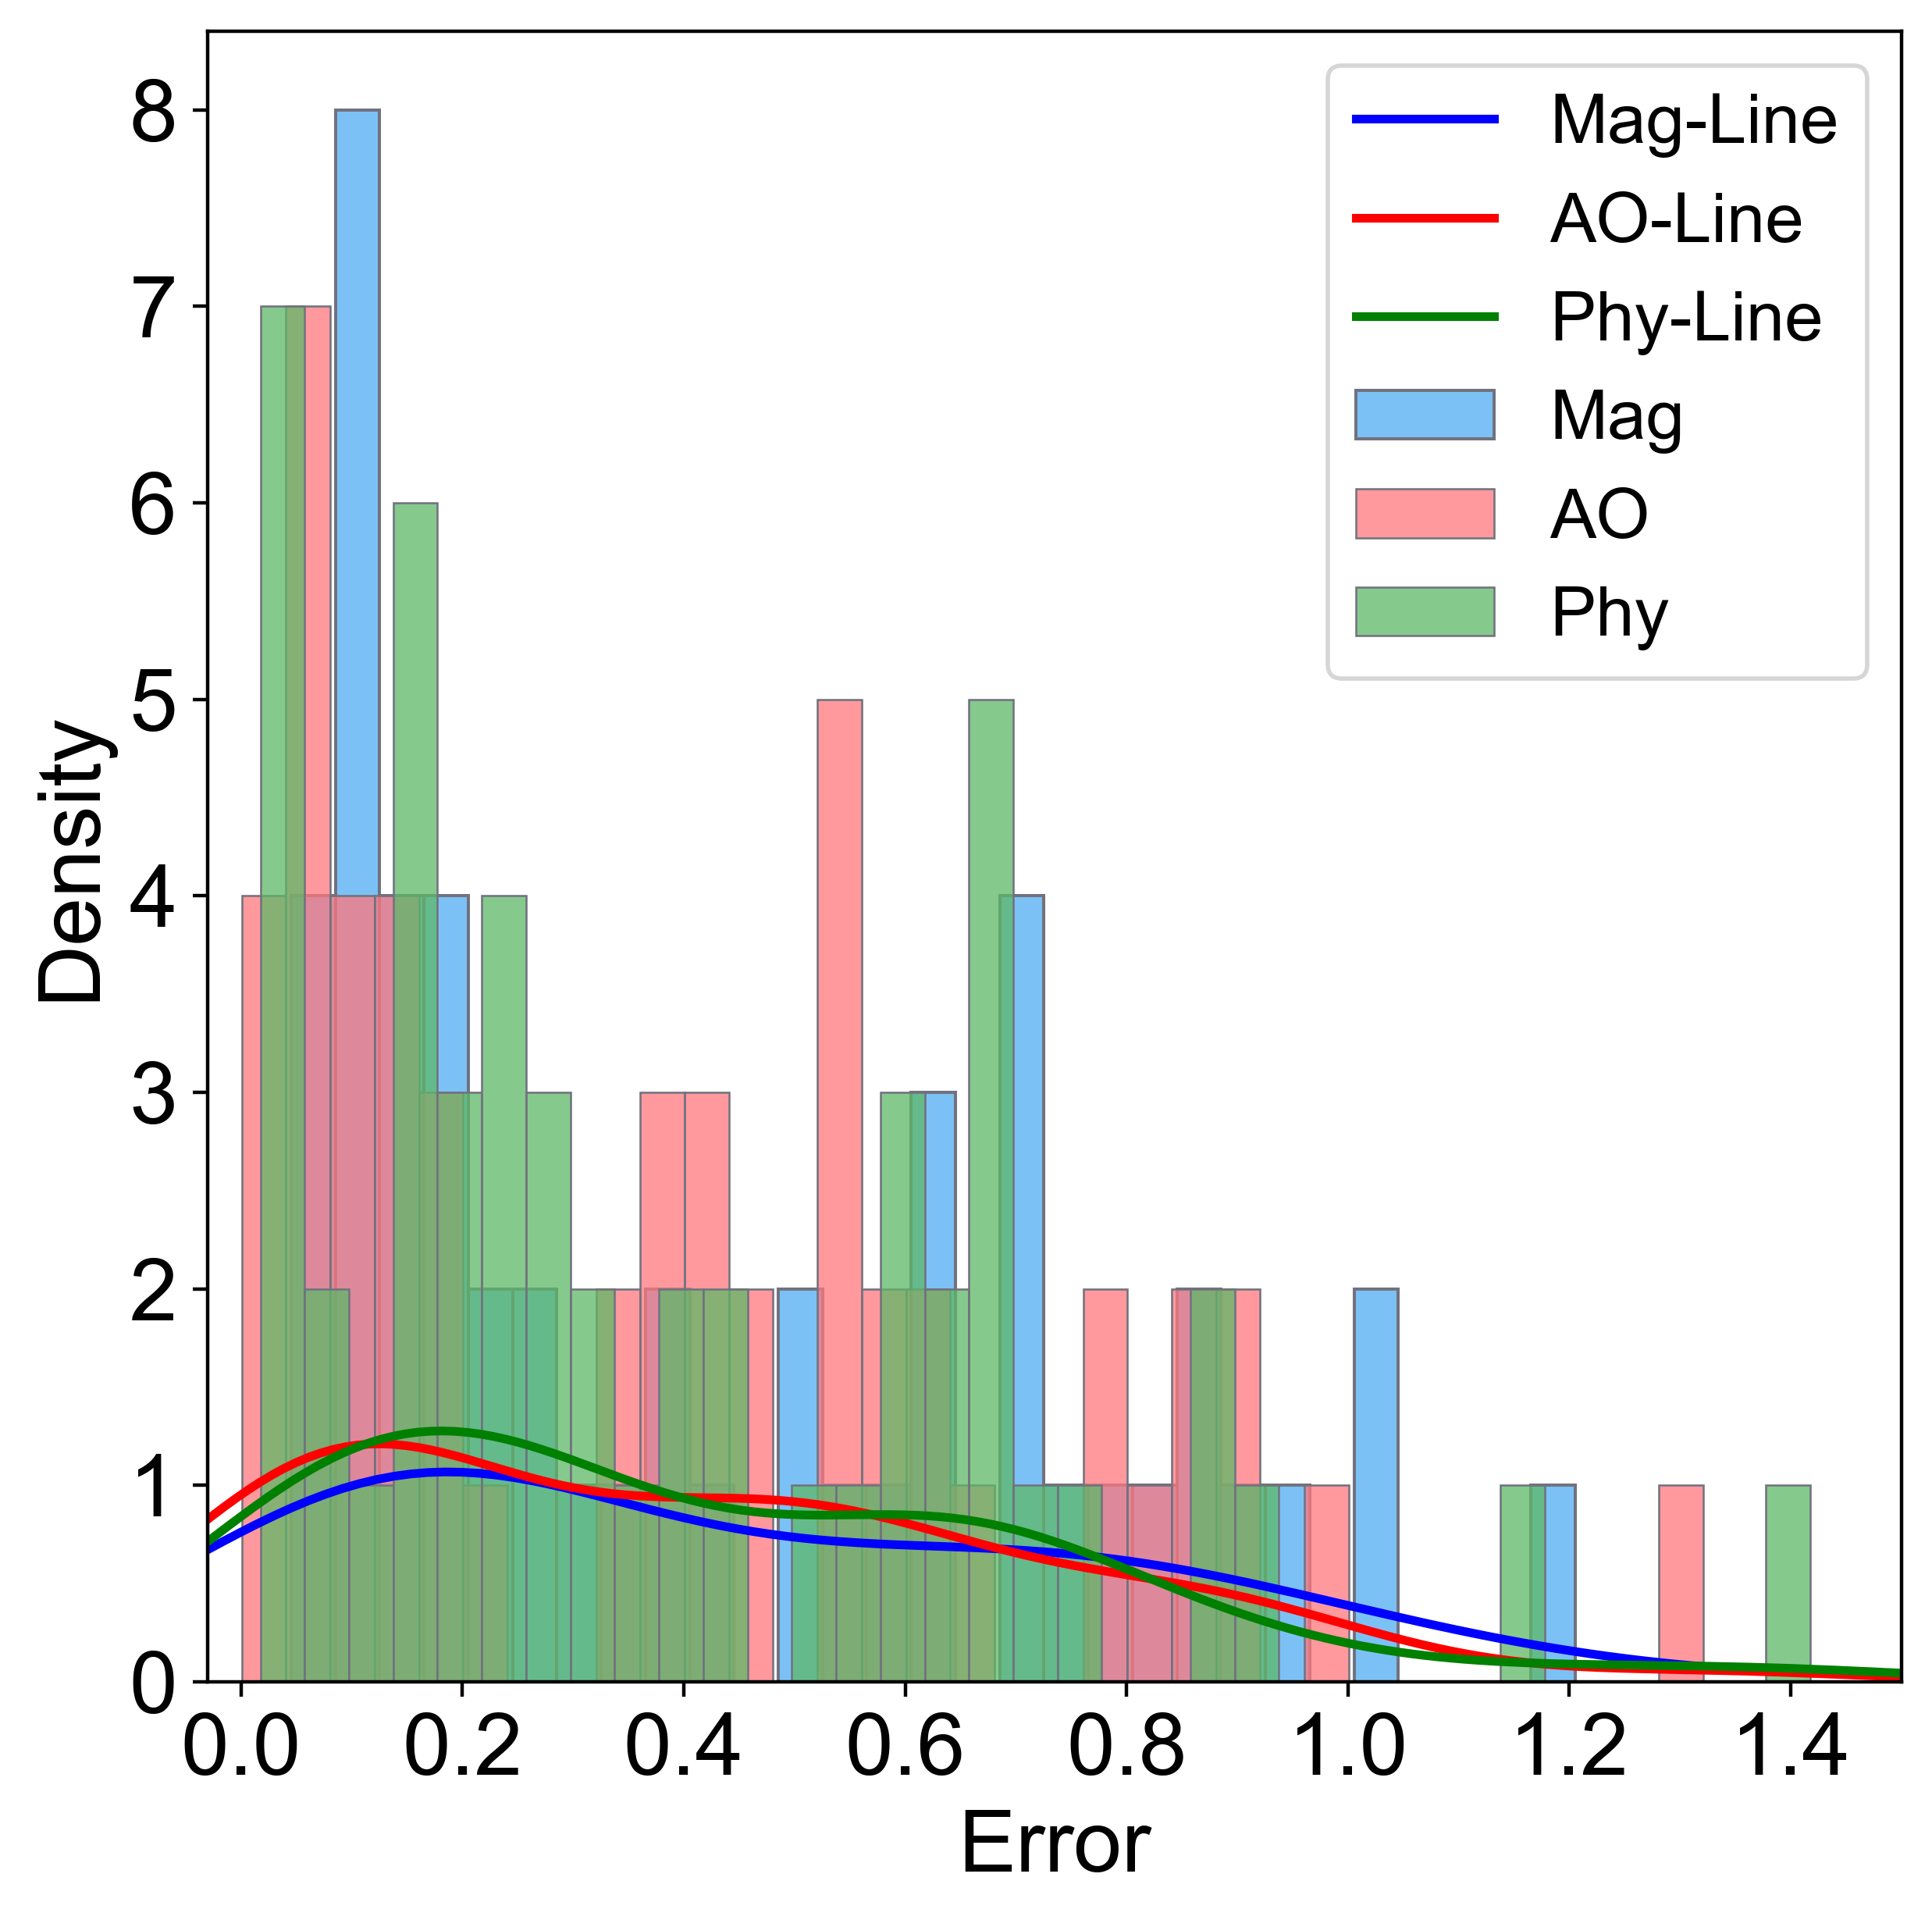

In [257]:
plt.figure(figsize=(7, 7))
sns.histplot(magpie_error,bins = 50,kde=False,color='#50acf4',label='Mag', binwidth=0.04,edgecolor='#71727F')
# sns.kdeplot(data=magpie_error, color='', linewidth=3, bw_method='scott', label='')
sns.kdeplot(data=magpie_error, color='blue', linewidth=2, bw_method='scott', label='Mag-Line')

sns.histplot(ec_error,bins = 50,kde=False,color='#ff777d',label='AO', binwidth=0.04,edgecolor='#71727F')
# sns.kdeplot(data=ec_error, color='', linewidth=3, bw_method='scott', label='')
sns.kdeplot(data=ec_error, color='red', linewidth=2, bw_method='scott', label='AO-Line')

sns.histplot(physic_error,bins = 50,kde=False,color='#5db867',label='Phy', binwidth=0.04,edgecolor='#71727F')
# sns.kdeplot(data=physic_error, color='', linewidth=3, bw_method='scott', label='')
sns.kdeplot(data=physic_error, color='green', linewidth=2, bw_method='scott', label='Phy-Line')

plt.xlim(-0.03,1.5)
plt.xlabel('Error',fontsize = 20)
plt.ylabel('Density',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend()
plt.savefig('wucha2.png',format = 'png',dpi=400, bbox_inches='tight')
plt.show()

/home/zhouhairui/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhouhairui/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhouhairui/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

(-0.03, 5.0)

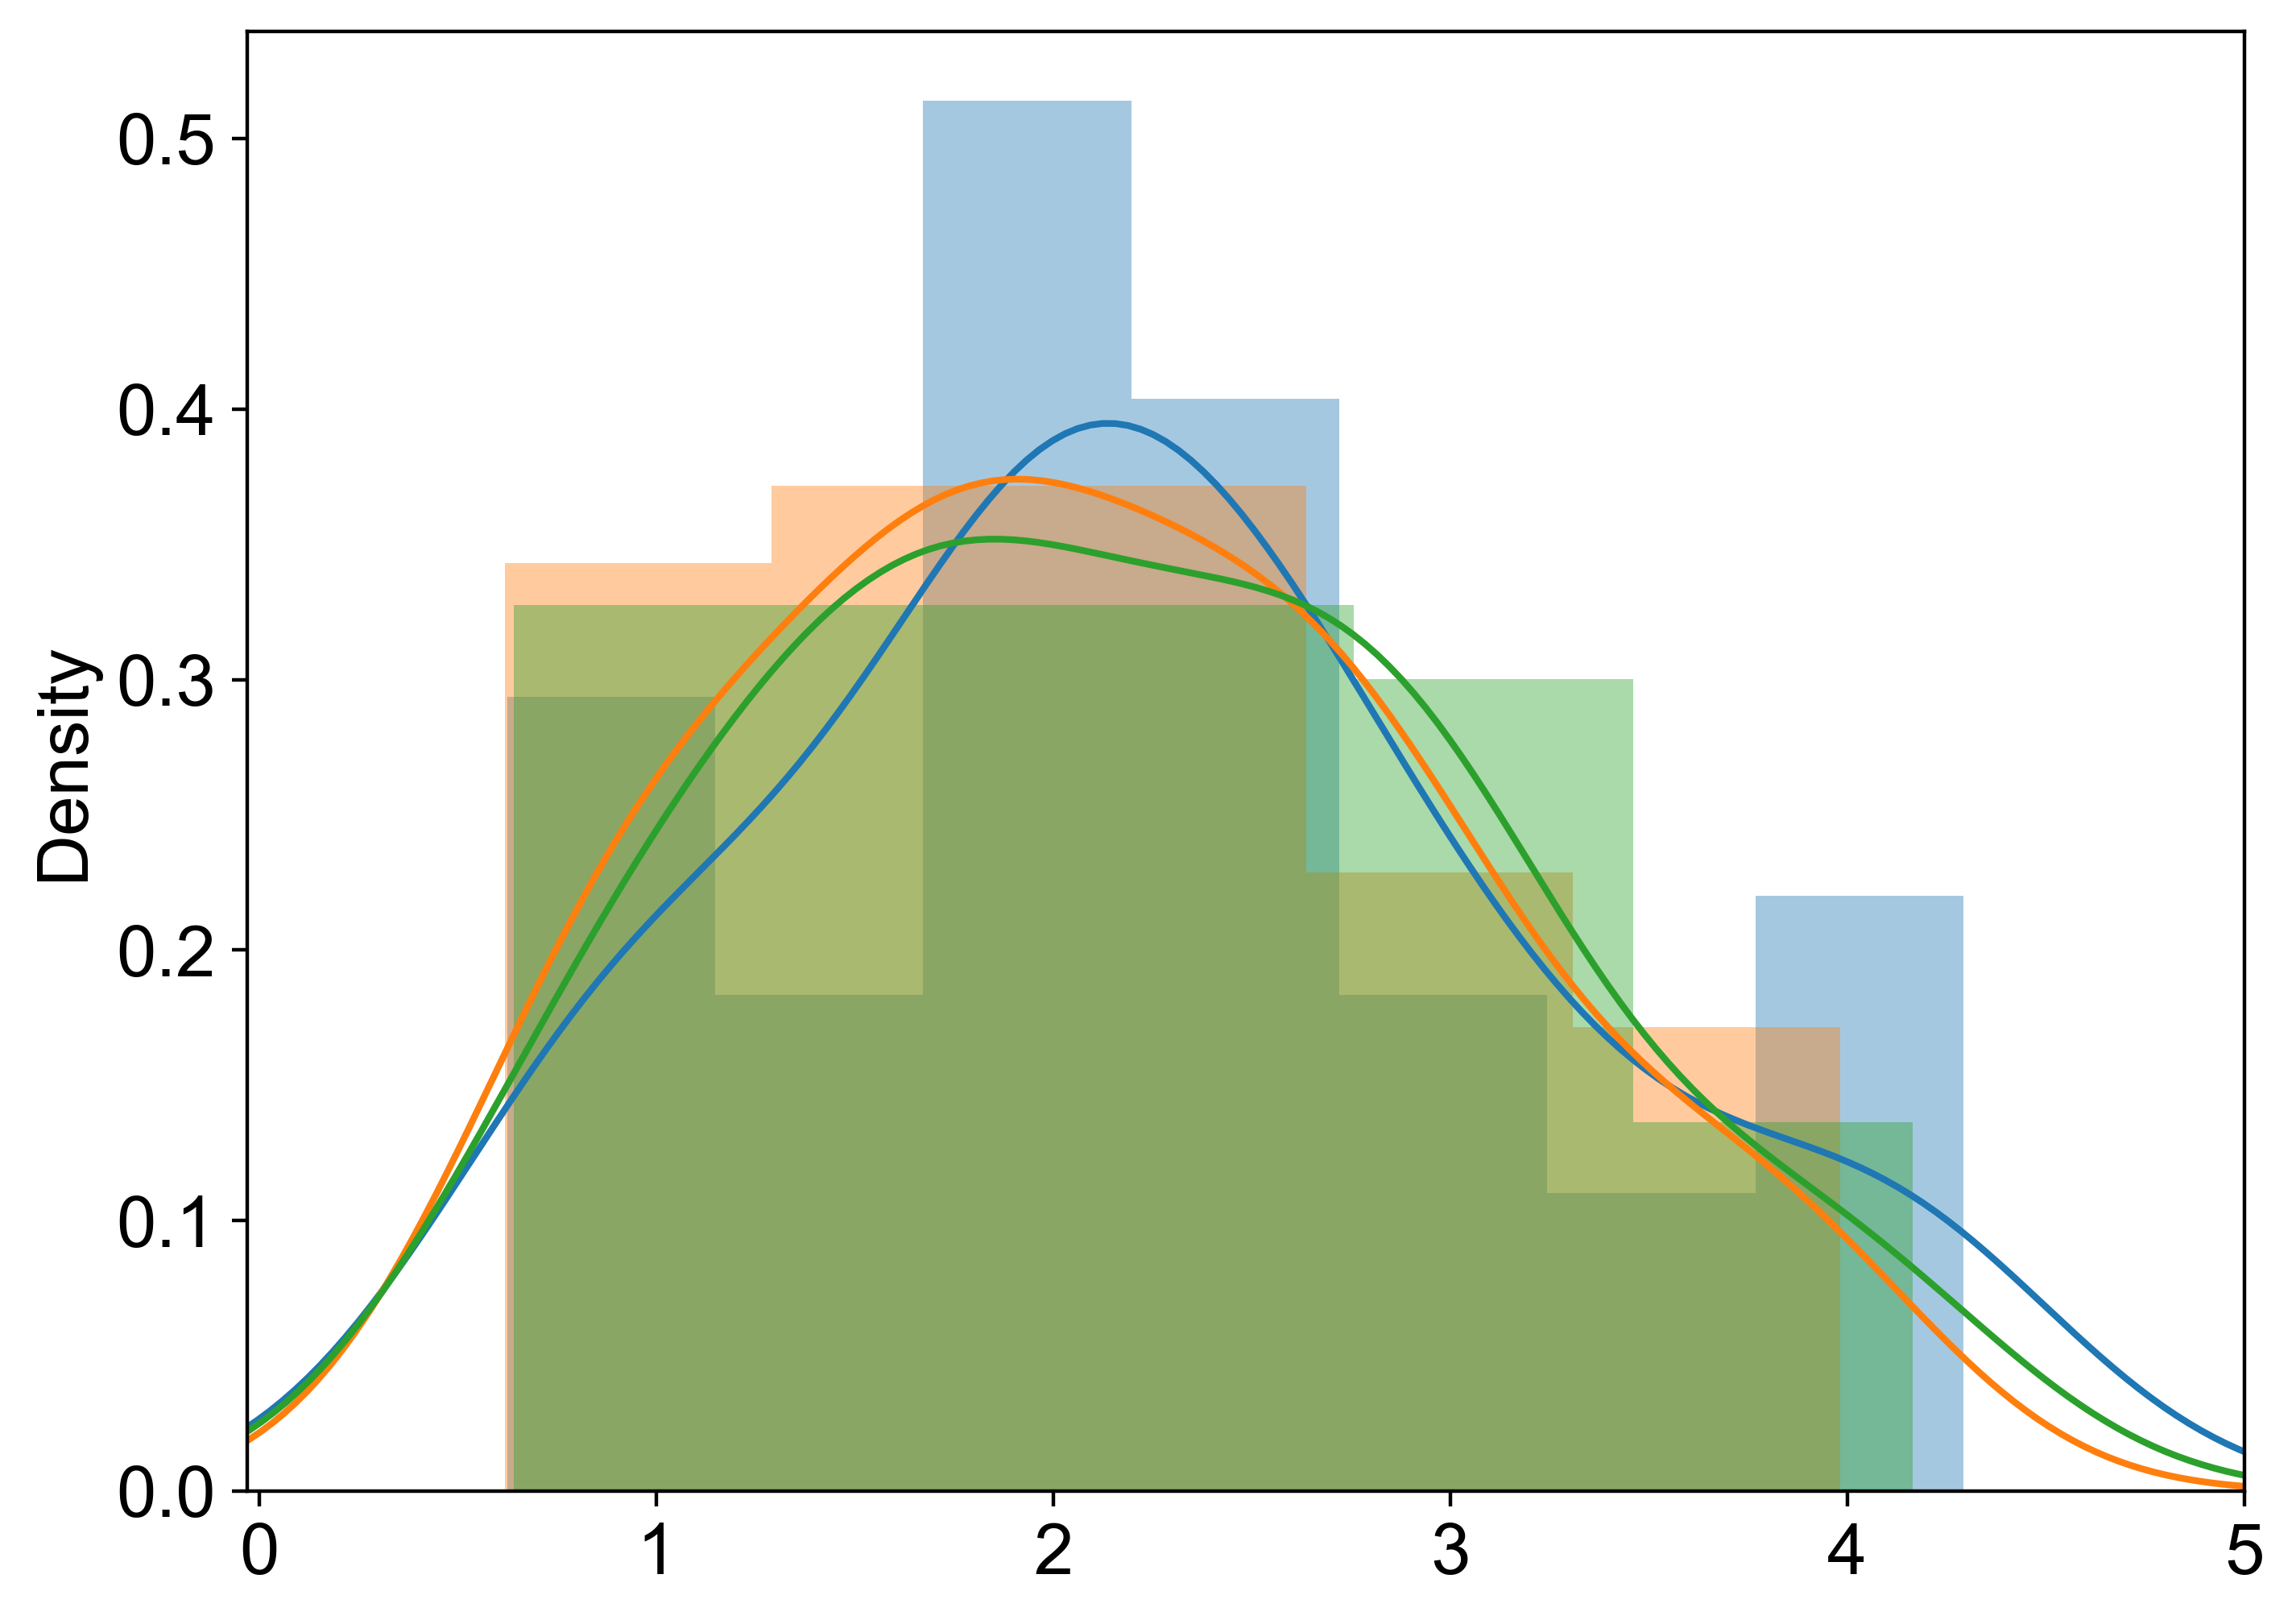

In [142]:
sns.distplot(magpie_error[['pred_Eg',]])
sns.distplot(sorted_ec[['pred_Eg']])
sns.distplot(sorted_physic[['pred_Eg']])
plt.xlim(-0.03,5)

In [ ]:
errors = np.vstack([magpie_error,ec_error,physic_error])
pearson_matrix = np.corrcoef(errors)

In [53]:
pearson_matrix

array([[1.        , 0.57907069, 0.63085932],
       [0.57907069, 1.        , 0.88608112],
       [0.63085932, 0.88608112, 1.        ]])

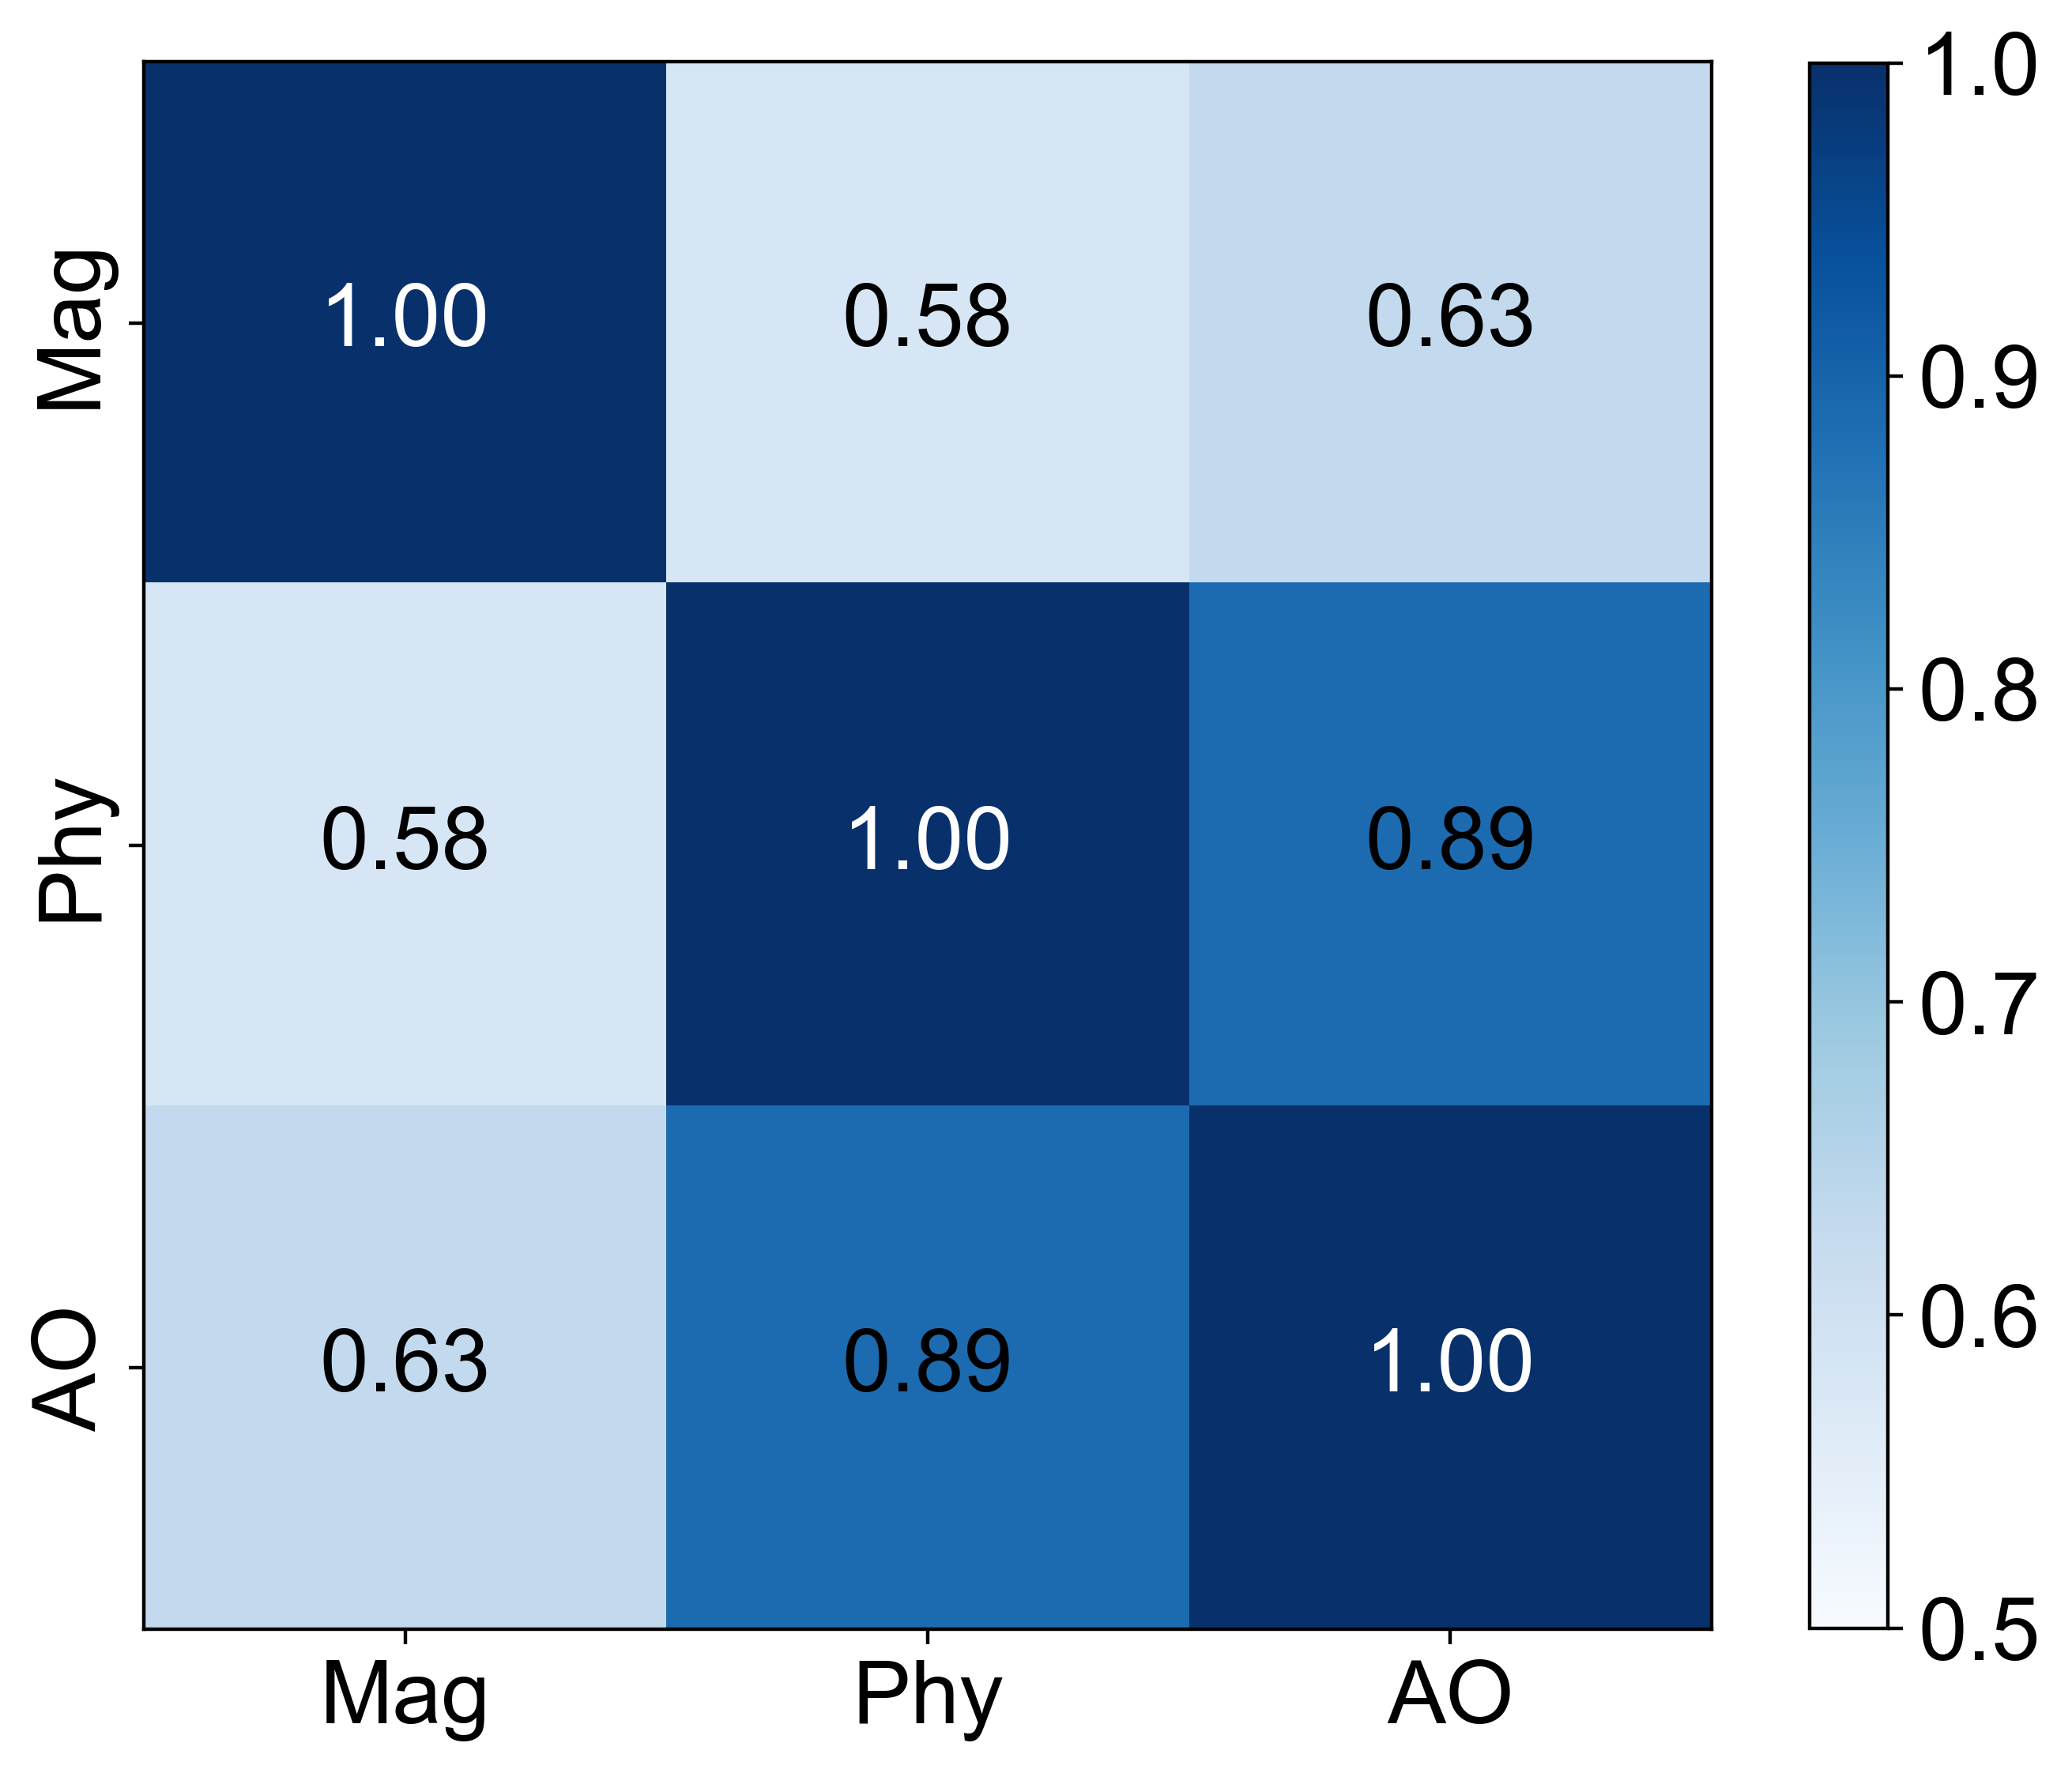

In [ ]:
plt.figure(figsize=(8, 8))
labels = ['Mag', 'Phy', 'AO']

heatmap = plt.imshow(pearson_matrix, cmap='Blues', vmin=0.5, vmax=1,interpolation='nearest')  
cbar = plt.colorbar(heatmap, shrink=0.82)
cbar.ax.tick_params(labelsize=20)

for i in range(pearson_matrix.shape[0]):
    for j in range(pearson_matrix.shape[1]):

        text_color = 'white' if pearson_matrix[i,j] == 1 else 'black'
        plt.text(j, i, f'{pearson_matrix[i,j]:.2f}',
                ha='center', va='center',
                color=text_color, fontsize=20, weight='medium')

plt.xticks(np.arange(len(labels)), labels, fontsize=20)
plt.yticks(np.arange(len(labels)), labels, fontsize=20,rotation=90,va='center')

plt.tick_params(axis='both',
               which='both',
               top=False, 
               bottom=True,
               left=True,
               right=False,
               labelbottom=True,
               labeltop=False)

plt.tick_params(axis='both', labelsize=20)
plt.savefig('wucha1.png',format = 'png',dpi=400, bbox_inches='tight')

In [25]:
large_magpie_error = pd.read_csv('large_magpie_error.csv').drop(columns = 'Unnamed: 0')
large_EC_error = pd.read_csv('large_ec_error.csv').drop(columns = 'Unnamed: 0')
large_physic_error = pd.read_csv('large_physical_error.csv').drop(columns = 'Unnamed: 0')

In [26]:
large_magpie_error = large_magpie_error['diff']
large_EC_error = large_EC_error['diff']
large_physic_error = large_physic_error['diff']

In [ ]:
large_errors = np.vstack([large_magpie_error,large_EC_error,large_physic_error])

large_pearson_matrix = np.corrcoef(large_errors)

large_pearson_matrix

array([[1.        , 0.99750182, 0.99648378],
       [0.99750182, 1.        , 0.99806385],
       [0.99648378, 0.99806385, 1.        ]])